In [16]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
data = pd.read_csv("data/revenue_distribution_by_sector.csv")

In [18]:
data_wide = data.pivot_table(index="entity_id", columns="nace_level_2_code", values="revenue_pct", aggfunc="sum",fill_value=0)

sector_wide = data_wide.reset_index()
print("Pivot complete. Shape:", sector_wide.shape)

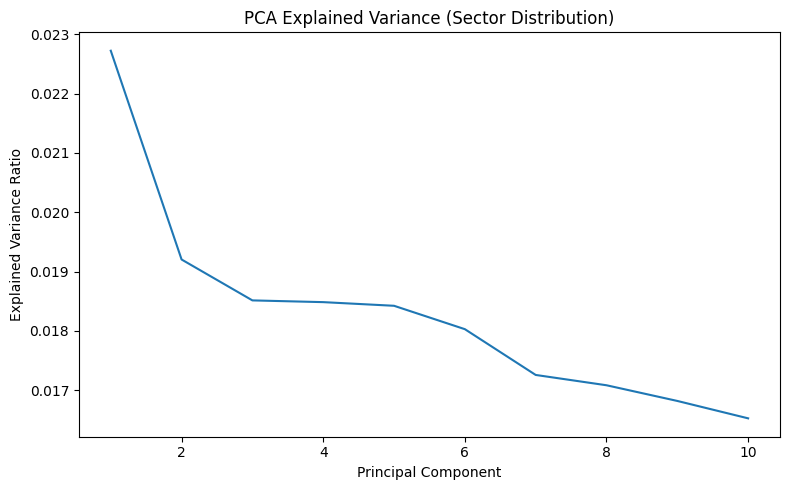

In [26]:
cols = [c for c in sector_wide.columns if c != "entity_id"]
scaler = StandardScaler()
data_fit = scaler.fit_transform(sector_wide[cols])

sector_scaled_df = pd.DataFrame(data_fit,columns=cols,index=sector_wide.index)

pca = PCA(n_components=10, random_state=42)
sector_pca = pca.fit_transform(sector_scaled_df)

sector_pca_df = pd.DataFrame(sector_pca, columns=[f"{i+1}" for i in range(10)])
sector_pca_df["entity_id"] = sector_wide["entity_id"]
for i, v in enumerate(pca.explained_variance_ratio_[:10]):
    print(f"  Component {i+1}: {v:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance (Sector Distribution)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()